# Data Exploration - Oticon Audio Explorers

In [35]:
from pathlib2 import Path

import numpy as np
import pandas as pd

from scipy.io import loadmat

import matplotlib.pyplot as plt

### Load data

In [11]:
DATA_DIR = Path('../../data')

# Load npy-files
Xtrain  = np.load(DATA_DIR / 'raw/npy/training.npy')
ttrain  = np.load(DATA_DIR / 'raw/npy/training_labels.npy')
Xtest   = np.load(DATA_DIR / 'raw/npy/test.npy')

# Load matlab files
Xtrain_mat = loadmat(DATA_DIR / 'raw/mat/training.mat', squeeze_me=True)
ttrain_mat = loadmat(DATA_DIR / 'raw/mat/training_labels.mat', squeeze_me=True)
Xtest_mat = loadmat(DATA_DIR / 'raw/mat/test.mat', squeeze_me=True)

# Ensure no data difference
assert np.all(Xtrain_mat['data'] == Xtrain)
assert np.all(ttrain_mat['data'] == ttrain)
assert np.all(Xtest_mat['data'] == Xtest)

# Clean up
del Xtrain_mat
del ttrain_mat
del Xtest_mat

In [42]:
print(f"Xtrain: {Xtrain.shape}")
print(f"ttrain: {ttrain.shape}")
print(f"Xtest: {Xtest.shape}")

print(f"\nttrain in --> {np.unique(ttrain)}")

print(f"\nXtrain (min, max): {Xtrain.min(), Xtrain.max()}")
print(f"\nXtrain (min, max): {Xtrain.min(), Xtrain.max()}")
print(f"\nXtrain (min, max): {Xtrain.min(), Xtrain.max()}")

Xtrain: (52890, 32, 96)
ttrain: (52890,)
Xtest: (5347, 32, 96)

ttrain in --> [0 1 2 3 4]
Xtrain (min, max): (-80.0, 7.6293945e-06)


In [41]:
Xtrain.min()

-80.0

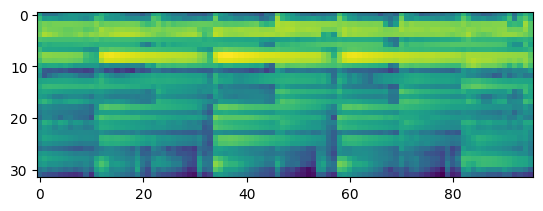

In [36]:
plt.imshow(Xtrain[0])
plt.show()

array([0, 1, 2, 3, 4])